# Second Exercise: Contact tracing

Now that we've learned about _adjacency matrices_ and different types of networks, let's see how our knowledge can help us do something super relevant: contact tracing.

First we'll start by loading the packages we'll need!

**PUT your TEAM NAME here**

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Let's assume we've asked a group of people who they've made contact with in the past week. We have translated their responses into the form of an _adjacency matrix_. The adjacency matrix has been stored as the file `contacts.csv`. Let's read it in!

In [2]:
folder = "" #it's stored in my current folder
file = "contacts"
ext = ".csv"
contacts = np.genfromtxt(folder+file+ext, dtype=int, delimiter=',', skip_header=False)

As we learned today, the columns and rows represent people in the group, and a 1 in the (i,j) index of the matrix means that person i and person j have made contact in the past week. Let's assume that the people in this data set are all represented by integer IDs and their IDs correspond to their row in the matrix (e.g., person with ID 0 is in the first row of the matrix). 

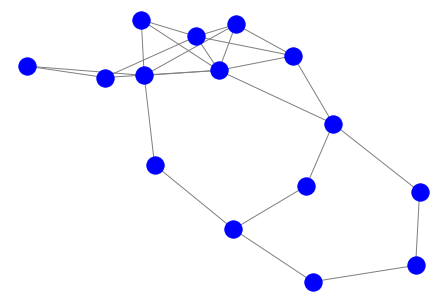

In [3]:
contact_network = nx.from_numpy_matrix(contacts)

pos = nx.spring_layout(contact_network, k=0.15, iterations=20)

nx.draw(contact_network, pos, node_color='b', node_size=300, edge_color='grey', with_labels=False)

Now assume we've learned that node 3 has tested positive with COVID! 

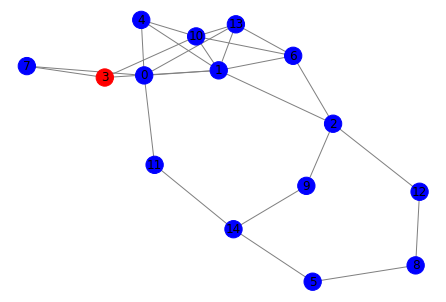

In [4]:
colors = ['b']*len(contacts)
colors[3] = 'r'
nx.draw(contact_network, pos, node_color=colors, node_size=300, edge_color='grey', with_labels=True)

Suppose we wanted to notify all of the people node 3 had been in contact with in the past week. How would we find out from the adjacency matrix who they are?

In [5]:
print(contacts[3, :])

[0 1 0 0 0 0 0 1 0 0 1 0 0 0 0]


Here we see that nodes 1, 7, and 10 have been in contact with node 3 in the past week. Another way to find this is to use `numpy`'s `where()` function. If we want to find out the indices where the fourth (remember 0 indexing!) row of the adjacency matrix is equal to 1 (indicating that node 3 has been in contact with them!) we call the `where()` function as follows:

In [8]:
exposed = np.where(contacts[3,:] == 1)[0]
print(exposed)

[ 1  7 10]


Let's now color the nodes in the graph to be orange if they have been in direct contact with the infected person

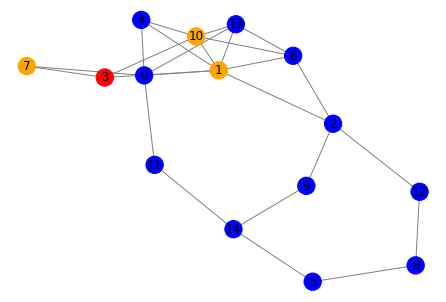

In [9]:
colors = ['b']*len(contacts)
colors[3] = 'r'

for e in exposed:
    colors[e] = 'orange'
    
nx.draw(contact_network, pos, node_color=colors, node_size=300, edge_color='grey', with_labels=True)

## Finding contacts with `networkx` 
Let's say that the CDC has recommended that all _direct_ contacts of a positive individual must be notified of possible exposure. We can use the `descendants_at_distance()` function to find all nodes at distance 1 away from the positive node. 

In [10]:
distance_1 = list(nx.descendants_at_distance(contact_network, 3, 1))
print(distance_1)

[1, 10, 7]


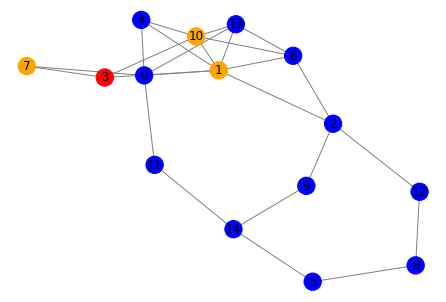

In [11]:
colors = ['b']*len(contacts)

colors[3] = 'r'

for e in distance_1:
    colors[e] = 'orange'
    
nx.draw(contact_network, pos, node_color=colors, node_size=300, edge_color='grey', with_labels=True)

The CDC has now recommended that all direct contacts of a positive individual _and_ all contacts of _those_ direct contacts must be notified of possible exposure. Use the `descendants_at_distance()` function to find all nodes at **distance 2** away from the positive node.

In [12]:
distance_2 = list(nx.descendants_at_distance(contact_network, 3, 2))

print(distance_2)

[0, 2, 4, 6, 13]


Now we'll color the nodes who are at distance 1 away in the network orange and the nodes at distance 2 away yellow.

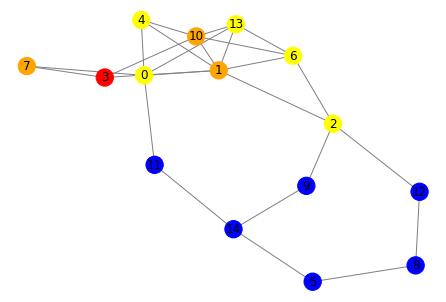

In [13]:
for e in distance_2:
    colors[e] = 'yellow'
    
nx.draw(contact_network, pos, node_color=colors, node_size=300, edge_color='grey', with_labels=True)

## Submitting
Download this '.ipynb' file _with your edits at the top_ and upload it to your team's channel in team. Tag one of the teaching team members once you've done it!

## Challenge
Above we used the `networkx` function `descendants_at_distance()` to find contacts of distance two away from the infected person. If you'd like to make a challenge for yourself, write your own function to find contacts of distance `d` away from the infected person. 

What if the CDC updates their guidelines so that now _anybody_ who has been remotely exposed to a positive individual must be notified of possible exposure. Put another way, all nodes at _any_ distance away from the infected individual must be notified. How can you use recursion to find _everyone_ at _any_ distance from the infected person?